# Proyecto 1

**Tema:** Predicción de enfermedades Cardíacas



|     Nombres      |      Apellidos       |     Login     |  Codigo   |
| :--------------: | :------------------: | :-----------: | :-------: |
|     Santiago     | Gonzalez Montealegre | s.gonzalez35  | 202012274 |
| Juliana Carolina |  Cardenas Barragan   | jc.cardenasb1 | 202011683 |


## Exploratory Data Analysis

### Libraries required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the Data

In [2]:
columns = {
    "age": {'meaning': 'age in years',
            'num': 3},
    "sex": {'meaning': 'sex (1 = male; 0 = female)',
            'num': 4},
    "cp": {'meaning': 'chest pain type 1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic',
           'num': 9},
    "trestbps": {'meaning': 'resting blood pressure (in mm Hg on admission to the hospital)',
                 'num': 10},
    "chol": {'meaning': 'serum cholestoral in mg/dl',
             'num': 12},
    "fbs": {'meaning': '(fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)',
            'num': 16},
    "restecg": {'meaning': 'resting electrocardiographic results 0: normal; 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: showing probable or definite left ventricular hypertrophy by Estes criteria',
                'num': 19},
    "thalach": {'meaning': 'maximum heart rate achieved',
                'num': 32},
    "exang": {'meaning': 'exercise induced angina (1 = yes; 0 = no)',
              'num': 38},
    "oldpeak": {'meaning': 'ST depression induced by exercise relative to rest',
                'num': 40},
    "slope": {'meaning': 'the slope of the peak exercise ST segment 1: upsloping; 2: flat; 3: downsloping',
              'num': 41},
    "ca": {'meaning': 'number of major vessels (0-3) colored by flourosopy',
           'num': 44},
    "thal": {'meaning': '3 = normal; 6 = fixed defect; 7 = reversable defect',
             'num': 51},
    "num": {'meaning': 'diagnosis of heart disease (angiographic disease status) 0: < 50% diameter narrowing; 1: > 50% diameter narrowing',
            'num': 58},
}

df = pd.read_csv("Data/processed.cleveland.data", names=[i for i in columns.keys()])

df.age = df.age.astype(int)
df.sex = df.sex.astype(int)
df.cp = df.cp.astype(int)
df.trestbps = df.trestbps.astype(int)
df.chol = df.chol.astype(int)
df.fbs = df.fbs.astype(int)
df.restecg = df.restecg.astype(int)
df.thalach = df.thalach.astype(int)
df.exang = df.exang.astype(int)
df.slope = df.slope.astype(int)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


### Exploring the Variables

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int32  
 1   sex       303 non-null    int32  
 2   cp        303 non-null    int32  
 3   trestbps  303 non-null    int32  
 4   chol      303 non-null    int32  
 5   fbs       303 non-null    int32  
 6   restecg   303 non-null    int32  
 7   thalach   303 non-null    int32  
 8   exang     303 non-null    int32  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int32  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int32(10), int64(1), object(2)
memory usage: 21.4+ KB


No hay datos nulos o datos faltantes a priori, sin embargo, se verificará este supuesto con cada variable.

### Age

Esta variable se encuentra en años y puede tomar cualquier valor entero positivo

In [4]:
df.age.describe()

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [5]:
rango = tuple(i for i in range(int(df.age.min()), int(df.age.max())+1))
df.query(f'age not in {rango}')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


No hay valores nulos, todos los valores se encuentran dentro del rango $[ 29, 77 ]$ para la edad de la persona

#### Histogram

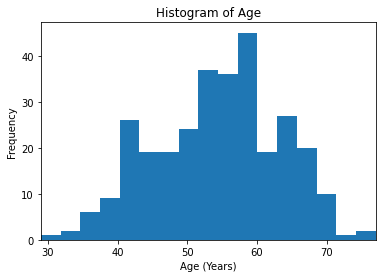

In [6]:
bins= int(len(df)**(1/2))
ax = df.age.plot(kind='hist', xlim=[int(df.age.min()), int(df.age.max())], bins=bins)
ax.set_xlabel('Age (Years)')
ax.set_title('Histogram of Age')
plt.show()

#### Density Plot

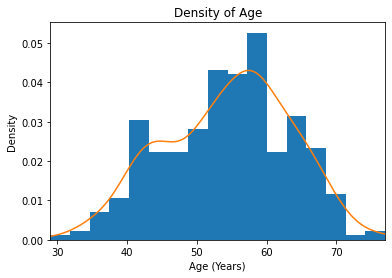

In [7]:
bins= int(len(df)**(1/2))
ax = df.age.plot.hist(density=True, xlim=[int(df.age.min()), int(df.age.max())], bins=bins)
df.age.plot.density(ax=ax)
ax.set_xlabel('Age (Years)')
ax.set_title('Density of Age')
plt.show()

Los datos de edad no se encuentran uniformemente distribuidos, presenta cierta forma de campana alrededor de los 50 y los 60 años. El dato mínimo de la edad es de 29 por lo que no se tienen datos de población joven. El dato máximo de la edad es de 77 por lo que no se tienen datos de población más mayor.

#### Boxplot

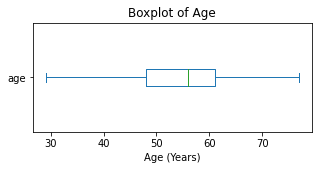

In [10]:
plt.figure(figsize=(5, 2))
ax = df.age.plot.box()
ax.set_xlabel('Age (Years)')
ax.set_title('Boxplot of Age')
plt.show()

**Outliers**

Por medio del IQR y la regla del `1.5 * IQR` se determina que no existen valores atípicos.

#### Violin Plot

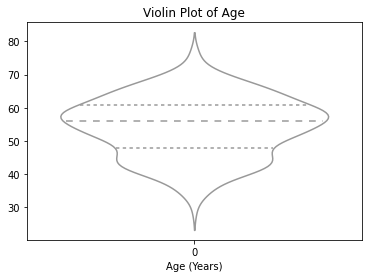

In [11]:
ax = sns.violinplot(df.age,
                    inner='quartile', color='white')
ax.set_xlabel('Age (Years)')
ax.set_title('Violin Plot of Age')
plt.show()

### Sex

Esta variable puede tomar dos valores:

- 0: Mujer
- 1: Hombre

In [10]:
df.query('sex not in (0, 1)')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


No hay valores nulos, todos los valores se encuentran dentro del rango $\{0, 1\}$ para el sexo de la persona

In [11]:
bar = df.groupby('sex').agg(count = ('sex', 'count'))
bar['prob'] = bar['count'] / bar['count'].sum()
bar

,count,prob
sex,,
0,97,0.320132
1,206,0.679868


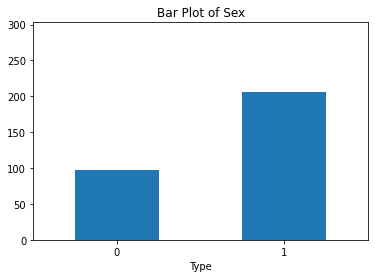

In [12]:
ax = bar['count'].plot.bar(rot=0, ylim=[0, len(df)], legend=False)
ax.set_title('Bar Plot of Sex')
ax.set_xlabel('Type')
plt.show()

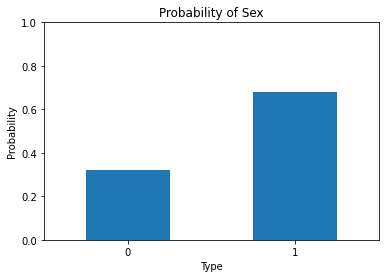

In [13]:
ax = bar['prob'].plot.bar(rot=0, ylim=[0, 1], legend=False)
ax.set_title('Probability of Sex')
ax.set_xlabel('Type')
ax.set_ylabel('Probability')
plt.show()

Los datos de sexo no se encuentran uniformemente distribuidos, alrededor de 2/3 de los datos son de hombres.

### Chest Pain

Esta variable puede tomar 4 valores:

- 1: Angina Típica
- 2: Angina Atípica
- 3: Dolor de pecho no anginal
- 4: Asintomático

In [14]:
df.query('cp not in (1, 2, 3, 4)')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


No hay valores nulos, todos los valores se encuentran dentro del rango $\{ 1, 2, 3, 4 \}$ para el dolor de pecho de la persona.

In [15]:
bar = df.groupby('cp').agg(count=('cp', 'count'))
bar['prob'] = bar['count'] / bar['count'].sum()
bar

,count,prob
cp,,
1,23,0.075908
2,50,0.165017
3,86,0.283828
4,144,0.475248


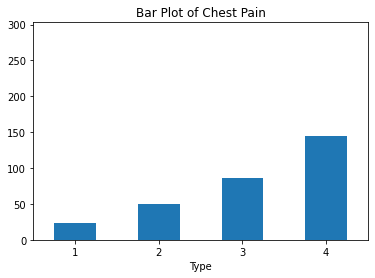

In [16]:
ax = bar['count'].plot.bar(legend=False, ylim=[0, len(df)])
ax.set_title('Bar Plot of Chest Pain')
ax.set_xlabel('Type')
plt.xticks(rotation=0)
plt.show()

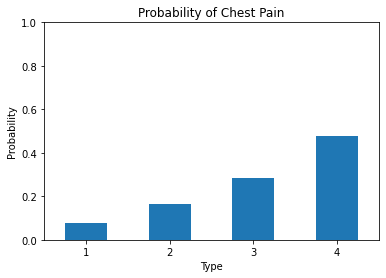

In [17]:
ax = bar.prob.plot.bar(legend=False, ylim=[0,1])
ax.set_title('Probability of Chest Pain')
ax.set_xlabel('Type')
ax.set_ylabel('Probability')
plt.xticks(rotation=0)
plt.show()

Los datos de Chest Pain no se encuentran uniformemente distribuidos.

- Casi la mitad de los datos son de personas asíntomaticas (48%).
- El 28% corresponde a personas con dolor de pecho no anginal.
- Las personas con angina atípica son el 16% de los datos.
- El 8% de las personas tienen angina típica.

### Resting Blood Pressure

Esta variable se encuentra en mm Hg y puede tomar valores enteros positivos.

In [18]:
df.trestbps.describe()

count    303.000000
mean     131.689769
std       17.599748
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [19]:
rango = tuple(i for i in range(int(df.trestbps.min()), int(df.trestbps.max())+1))
df.query(f'trestbps not in {rango}')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


No hay valores nulos, todos los valores se encuentran dentro del rango $[ 94, 200 ]$ para la presión de la sangre en reposo.

#### Histogram

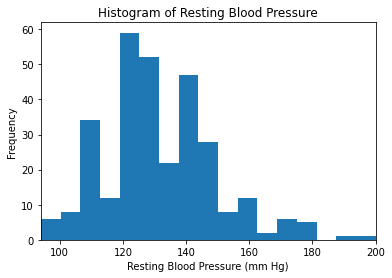

In [20]:
bins= int(len(df)**(1/2))
ax = df.trestbps.plot(kind='hist', xlim=[int(df.trestbps.min()), int(df.trestbps.max())], bins=bins)
ax.set_xlabel('Resting Blood Pressure (mm Hg)')
ax.set_title('Histogram of Resting Blood Pressure')
plt.show()

#### Density Plot

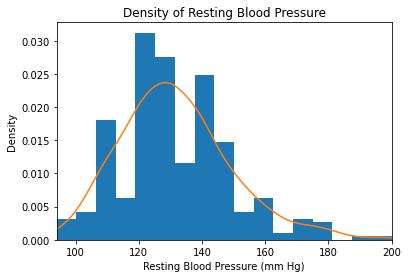

In [21]:
bins= int(len(df)**(1/2))
ax = df.trestbps.plot.hist(density=True, xlim=[int(df.trestbps.min()), int(df.trestbps.max())], bins=bins)
df.trestbps.plot.density(ax=ax)
ax.set_xlabel('Resting Blood Pressure (mm Hg)')
ax.set_title('Density of Resting Blood Pressure')
plt.show()

Los datos de la presión de la sangre en reposo no se encuentran uniformemente distribuidos.

Se  presenta cierta forma de campana alrededor de 130 mm Hg. 
El dato mínimo es de 94. El dato máximo es de 200.

#### Boxplot

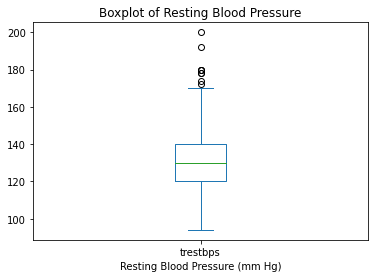

In [22]:
ax = df.trestbps.plot.box()
ax.set_xlabel('Resting Blood Pressure (mm Hg)')
ax.set_title('Boxplot of Resting Blood Pressure')
plt.show()

In [23]:
qu1 = df.trestbps.describe()['25%']
qu3 = df.trestbps.describe()['75%']
iqr = qu3 - qu1
variacion = iqr * 1.5
variacion
df.query(f'trestbps < ({qu1} - {variacion}) or trestbps > ({qu3} + {variacion})')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
14,52,1,3,172,199,1,0,162,0,0.5,1,0.0,7.0,0
83,68,1,3,180,274,1,2,150,1,1.6,2,0.0,7.0,3
126,56,0,4,200,288,1,2,133,1,4.0,3,2.0,7.0,3
172,59,0,4,174,249,0,0,143,1,0.0,2,0.0,3.0,1
183,59,1,1,178,270,0,2,145,0,4.2,3,0.0,7.0,0
188,54,1,2,192,283,0,2,195,0,0.0,1,1.0,7.0,1
201,64,0,4,180,325,0,0,154,1,0.0,1,0.0,3.0,0
213,66,0,4,178,228,1,0,165,1,1.0,2,2.0,7.0,3
231,55,0,4,180,327,0,1,117,1,3.4,2,0.0,3.0,2


**Outliers**

Por medio del IQR y la regla del `1.5 * IQR` es posible determinar que existen valores atípicos o outliers.

#### Violin Plot

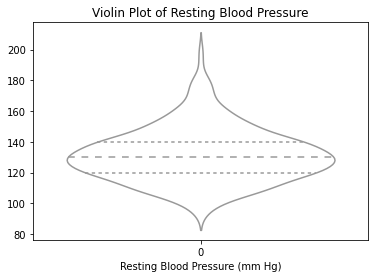

In [24]:
ax = sns.violinplot(df.trestbps, inner='quartile', color='white')
ax.set_xlabel('Resting Blood Pressure (mm Hg)')
ax.set_title('Violin Plot of Resting Blood Pressure')
plt.show()

### Serum Cholesterol

Esta variable se encuentra en mg/dl y puede tomar valores enteros positivos.

In [25]:
df.chol.describe()

count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: chol, dtype: float64

In [26]:
rango = tuple(i for i in range(int(df.chol.min()), int(df.chol.max())+1))
df.query(f'chol not in {rango}')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


No hay valores nulos, todos los valores se encuentran dentro del rango $[ 126, 564 ]$ para los niveles de coleterol

#### Histogram

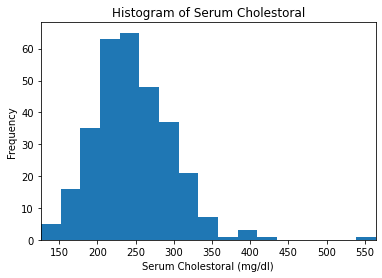

In [27]:
bins= int(len(df)**(1/2))
ax = df.chol.plot(kind='hist', xlim=[int(df.chol.min()), int(df.chol.max())], bins=bins)
ax.set_xlabel('Serum Cholestoral (mg/dl)')
ax.set_title('Histogram of Serum Cholestoral')
plt.show()

#### Density Plot

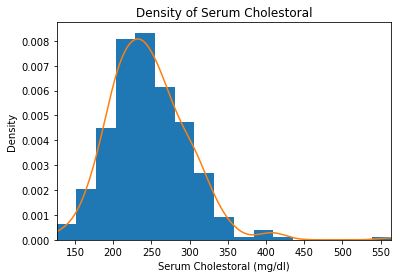

In [28]:
bins= int(len(df)**(1/2))
ax = df.chol.plot.hist(density=True, xlim=[int(df.chol.min()), int(df.chol.max())], bins=bins)
df.chol.plot.density(ax=ax)
ax.set_xlabel('Serum Cholestoral (mg/dl)')
ax.set_title('Density of Serum Cholestoral')
plt.show()

Los datos de la presión de la sangre en reposo no se encuentran uniformemente distribuidos.

Se  presenta cierta forma de campana alrededor de 130 mm Hg. 
El dato mínimo es de 94. El dato máximo es de 200.

#### Boxplot

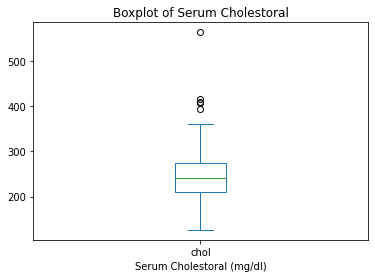

In [29]:
ax = df.chol.plot.box()
ax.set_xlabel('Serum Cholestoral (mg/dl)')
ax.set_title('Boxplot of Serum Cholestoral')
plt.show()

In [30]:
qu1 = df.chol.describe()['25%']
qu3 = df.chol.describe()['75%']
iqr = qu3 - qu1
variacion = iqr * 1.5
variacion
df.query(f'chol < ({qu1} - {variacion}) or chol > ({qu3} + {variacion})')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
48,65,0,3,140,417,1,2,157,0,0.8,1,1.0,3.0,0
121,63,0,4,150,407,0,2,154,0,4.0,2,3.0,7.0,4
152,67,0,3,115,564,0,2,160,0,1.6,2,0.0,7.0,0
173,62,0,4,140,394,0,2,157,0,1.2,2,0.0,3.0,0
181,56,0,4,134,409,0,2,150,1,1.9,2,2.0,7.0,2


**Outliers**

Por medio del IQR y la regla del `1.5 * IQR` es posible determinar que existen valores atípicos o outliers.

#### Violin Plot

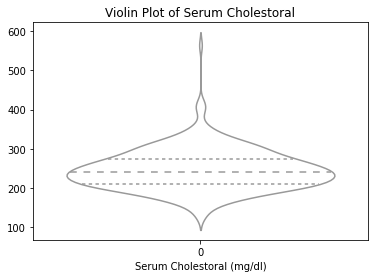

In [31]:
ax = sns.violinplot(df.chol, inner='quartile', color='white')
ax.set_xlabel('Serum Cholestoral (mg/dl)')
ax.set_title('Violin Plot of Serum Cholestoral')
plt.show()

### Fasting Blood Sugar

Esta variable puede tomar dos valores:

- 1: Si el nivel de Fasting Blood Sugar es mayor a 120 mg/dl
- 0: De lo contrario

In [32]:
df.query('fbs not in (0, 1)')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


No hay valores nulos, todos los valores se encuentran dentro del rango $\{0, 1\}$ para el nivel de glucemia de las personas

In [33]:
bar = df.groupby('fbs').agg(count = ('fbs', 'count'))
bar['prob'] = bar['count'] / bar['count'].sum()
bar

,count,prob
fbs,,
0,258,0.851485
1,45,0.148515


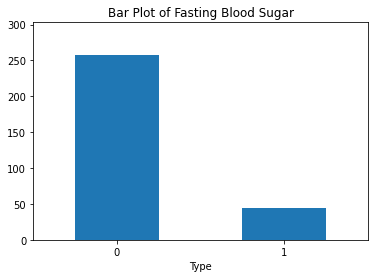

In [34]:
ax = bar['count'].plot.bar(rot=0, ylim=[0, 303], legend=False)
ax.set_title('Bar Plot of Fasting Blood Sugar')
ax.set_xlabel('Type')
plt.show()

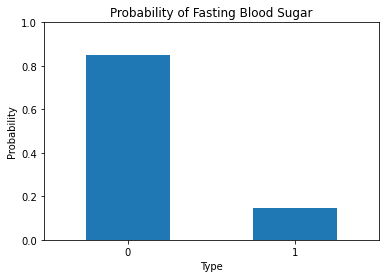

In [35]:
ax = bar['prob'].plot.bar(rot=0, ylim=[0, 1], legend=False)
ax.set_title('Probability of Fasting Blood Sugar')
ax.set_xlabel('Type')
ax.set_ylabel('Probability')
plt.show()

Los datos de glucemia no se encuentran uniformemente distribuidos.

El 85% de los datos pertenecen a personas con un nivel de glucemia menor a 120 mg/dl.

### Resting Electrocardiographic

Esta variable puede tomar 3 valores:

- 0: Normal
- 1: Anormalidad en la onda ST-T.
- 2: Probable hipertrofia ventricular izquierda.

In [36]:
df.query('restecg not in (0, 1, 2)')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


No hay valores nulos, todos los valores se encuentran dentro del rango $\{ 0, 1, 2 \}$ para el dolor de pecho de la persona.

In [37]:
bar = df.groupby('restecg').agg(count=('restecg', 'count'))
bar['prob'] = bar['count'] / bar['count'].sum()
bar

,count,prob
restecg,,
0,151,0.498350
1,4,0.013201
2,148,0.488449


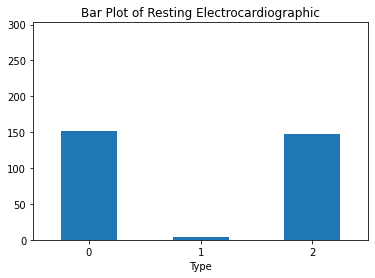

In [38]:
ax = bar['count'].plot.bar(legend=False, ylim=[0, len(df)])
ax.set_title('Bar Plot of Resting Electrocardiographic')
ax.set_xlabel('Type')
plt.xticks(rotation=0)
plt.show()

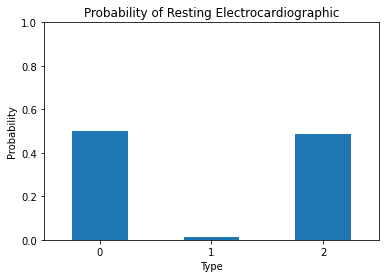

In [39]:
ax = bar.prob.plot.bar(legend=False, ylim=[0,1])
ax.set_title('Probability of Resting Electrocardiographic')
ax.set_xlabel('Type')
ax.set_ylabel('Probability')
plt.xticks(rotation=0)
plt.show()

Los datos de Resting Electrocardiographic no se encuentran uniformemente distribuidos.

- El 50% de los datos corresponden a resultados normales.
- El 1% de los datos corresponden a presencia de anormalidad en la onda ST-T.
- El 49% de los datos corresponden a probable hipertrofia ventricular izquierda.

### Maximum Heart rate

Esta variable se encuentra en mg/dl y puede tomar valores enteros positivos.

In [40]:
df.thalach.describe()

count    303.000000
mean     149.607261
std       22.875003
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [41]:
rango = tuple(i for i in range(int(df.thalach.min()), int(df.thalach.max())+1))
df.query(f'thalach not in {rango}')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


No hay valores nulos, todos los valores se encuentran dentro del rango $[ 71, 202 ]$ para la máxima frecuencia cardíaca.

#### Histogram

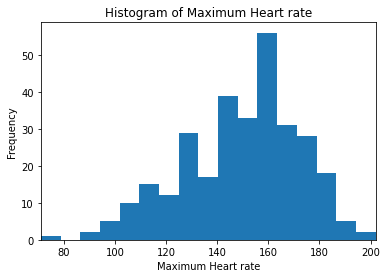

In [42]:
bins= int(len(df)**(1/2))
ax = df.thalach.plot(kind='hist', xlim=[int(df.thalach.min()), int(df.thalach.max())], bins=bins)
ax.set_xlabel('Maximum Heart rate')
ax.set_title('Histogram of Maximum Heart rate')
plt.show()

#### Density Plot

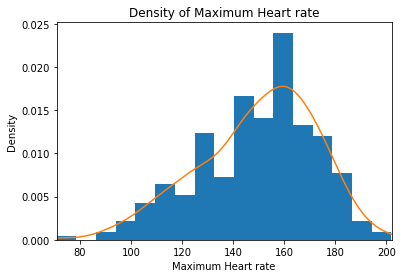

In [43]:
bins= int(len(df)**(1/2))
ax = df.thalach.plot.hist(density=True, xlim=[int(df.thalach.min()), int(df.thalach.max())], bins=bins)
df.thalach.plot.density(ax=ax)
ax.set_xlabel('Maximum Heart rate')
ax.set_title('Density of Maximum Heart rate')
plt.show()

Los datos de la presión de la sangre en reposo no se encuentran uniformemente distribuidos.

Se  presenta cierta forma de campana asimétrica alrededor de 160. 

El dato mínimo es de 71. El dato máximo es de 202.

#### Boxplot

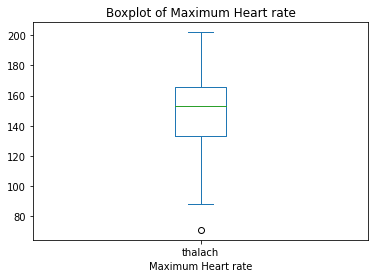

In [44]:
ax = df.thalach.plot.box()
ax.set_xlabel('Maximum Heart rate')
ax.set_title('Boxplot of Maximum Heart rate')
plt.show()

In [45]:
qu1 = df.thalach.describe()['25%']
qu3 = df.thalach.describe()['75%']
iqr = qu3 - qu1
variacion = iqr * 1.5
variacion
df.query(f'thalach < ({qu1} - {variacion}) or thalach > ({qu3} + {variacion})')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
245,67,1,4,120,237,0,0,71,0,1.0,2,0.0,3.0,2


**Outliers**

Por medio del IQR y la regla del `1.5 * IQR` es posible determinar que existen valores atípicos o outliers.

#### Violin Plot

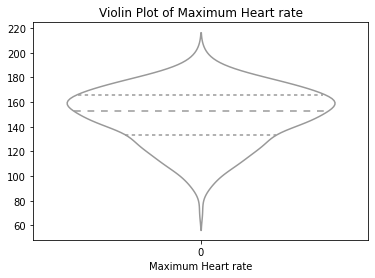

In [46]:
ax = sns.violinplot(df.thalach, inner='quartile', color='white')
ax.set_xlabel('Maximum Heart rate')
ax.set_title('Violin Plot of Maximum Heart rate')
plt.show()

### Exercise Induced Angina

Esta variable puede tomar dos valores:

- 1: Yes
- 0: No

In [47]:
df.query('exang not in (0, 1)')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


No hay valores nulos, todos los valores se encuentran dentro del rango $\{0, 1\}$ para el sexo de la persona

In [48]:
bar = df.groupby('exang').agg(count = ('exang', 'count'))
bar['prob'] = bar['count'] / bar['count'].sum()
bar

,count,prob
exang,,
0,204,0.673267
1,99,0.326733


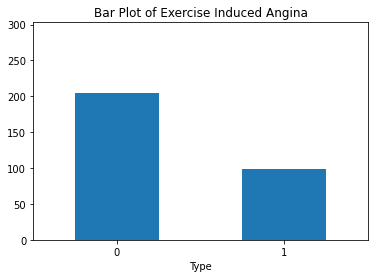

In [49]:
ax = bar['count'].plot.bar(rot=0, ylim=[0, len(df)], legend=False)
ax.set_title('Bar Plot of Exercise Induced Angina')
ax.set_xlabel('Type')
plt.show()

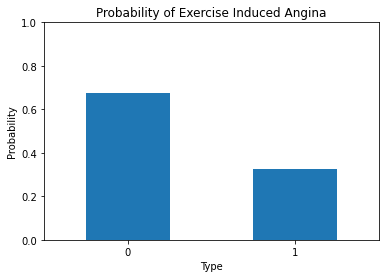

In [50]:
ax = bar['prob'].plot.bar(rot=0, ylim=[0, 1], legend=False)
ax.set_title('Probability of Exercise Induced Angina')
ax.set_xlabel('Type')
ax.set_ylabel('Probability')
plt.show()

Los datos de sexo no se encuentran uniformemente distribuidos.

El 67% de los datos son de personas que no sufren de angina inducida por ejercicio.

### ST Depression Induced by Exercise Relative to Rest

Esta variable puede tomar valores flotantes positivos.

In [51]:
df.oldpeak.describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

In [52]:
rango = tuple(i for i in range(int(df.oldpeak.min()), int(df.oldpeak.max())+1))
df.query(f'oldpeak < {df.oldpeak.min()} or oldpeak > {df.oldpeak.max()}')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


No hay valores nulos, todos los valores se encuentran dentro del rango $[ 0, 6.2 ]$ para la depresión del segmento ST inducidad por el ejercicio

#### Histogram

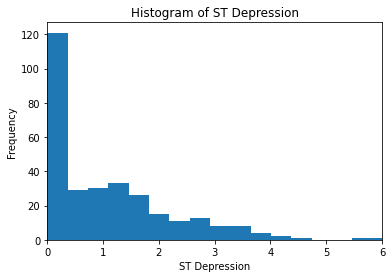

In [53]:
bins= int(len(df)**(1/2))
ax = df.oldpeak.plot(kind='hist', xlim=[int(df.oldpeak.min()), int(df.oldpeak.max())], bins=bins)
ax.set_xlabel('ST Depression')
ax.set_title('Histogram of ST Depression')
plt.show()

#### Density Plot

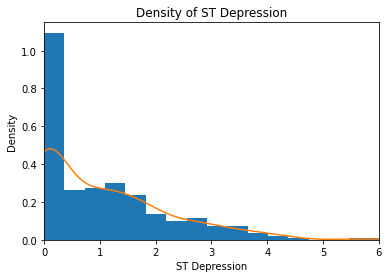

In [54]:
bins= int(len(df)**(1/2))
ax = df.oldpeak.plot.hist(density=True, xlim=[int(df.oldpeak.min()), int(df.oldpeak.max())], bins=bins)
df.oldpeak.plot.density(ax=ax)
ax.set_xlabel('ST Depression')
ax.set_title('Density of ST Depression')
plt.show()

Los datos de la presión de la sangre en reposo no se encuentran uniformemente distribuidos.

Se  presenta cierta forma de campana alrededor de 130 mm Hg. 
El dato mínimo es de 94. El dato máximo es de 200.

#### Boxplot

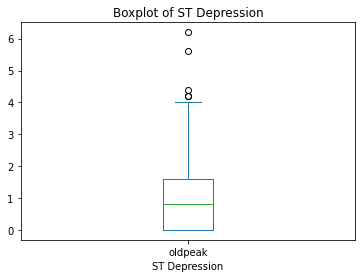

In [55]:
ax = df.oldpeak.plot.box()
ax.set_xlabel('ST Depression')
ax.set_title('Boxplot of ST Depression')
plt.show()

In [56]:
qu1 = df.oldpeak.describe()['25%']
qu3 = df.oldpeak.describe()['75%']
iqr = qu3 - qu1
variacion = iqr * 1.5
variacion
df.query(f'oldpeak < ({qu1} - {variacion}) or oldpeak > ({qu3} + {variacion})')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
91,62,0,4,160,164,0,2,145,0,6.2,3,3.0,7.0,3
123,55,1,4,140,217,0,0,111,1,5.6,3,0.0,7.0,3
183,59,1,1,178,270,0,2,145,0,4.2,3,0.0,7.0,0
191,51,1,4,140,298,0,0,122,1,4.2,2,3.0,7.0,3
285,58,1,4,114,318,0,1,140,0,4.4,3,3.0,6.0,4


**Outliers**

Por medio del IQR y la regla del `1.5 * IQR` es posible determinar que existen valores atípicos o outliers.

#### Violin Plot

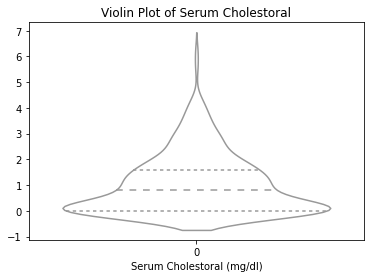

In [57]:
ax = sns.violinplot(df.oldpeak, inner='quartile', color='white')
ax.set_xlabel('Serum Cholestoral (mg/dl)')
ax.set_title('Violin Plot of Serum Cholestoral')
plt.show()

### Slope of the Peak Exercise ST Segment

Esta variable puede tomar dos valores:

- 1: Upsloping
- 2: Flat
- 3: Downsloping

In [58]:
df.query('slope not in (1, 2, 3)')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


No hay valores nulos, todos los valores se encuentran dentro del rango $\{1, 2, 3 \}$ para el sexo de la persona

In [59]:
bar = df.groupby('slope').agg(count = ('slope', 'count'))
bar['prob'] = bar['count'] / bar['count'].sum()
bar

,count,prob
slope,,
1,142,0.468647
2,140,0.462046
3,21,0.069307


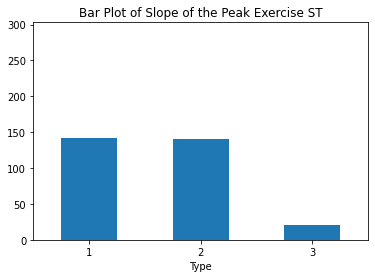

In [60]:
ax = bar['count'].plot.bar(rot=0, ylim=[0, len(df)], legend=False)
ax.set_title('Bar Plot of Slope of the Peak Exercise ST')
ax.set_xlabel('Type')
plt.show()

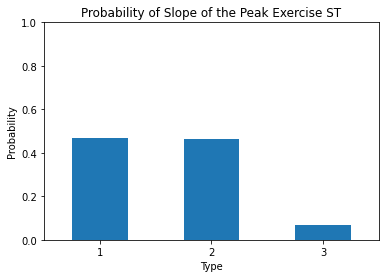

In [61]:
ax = bar['prob'].plot.bar(rot=0, ylim=[0, 1], legend=False)
ax.set_title('Probability of Slope of the Peak Exercise ST')
ax.set_xlabel('Type')
ax.set_ylabel('Probability')
plt.show()

Los datos de sexo no se encuentran uniformemente distribuidos.

- El 47% de los datos son de pendiente ascendiente.
- El 46% de los datos son de pendiente plana.
- El 7% de los datos son de pendiente descendiente.

### Number of Vessels Colored by Flourosopy

Esta variable puede tomar cuatro valores:

- 0
- 1
- 2
- 3

In [62]:
df.query('ca not in ("0.0", "1.0", "2.0", "3.0")')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
166,52,1,3,138,223,0,0,169,0,0.0,1,?,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,?,7.0,1
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


Hay valores nulos, no todos los valores se encuentran dentro del rango $\{0, 1, 2, 3 \}$ para el numero de vasos coloreados por fluoroscopia.

Se estudiará como sustituir estos valores nulos (`"?"`) o si estas filas deberán ser omitidas.

In [63]:
prueba = df[['ca']].copy()
prueba = prueba[prueba['ca'] != '?']
prueba.ca = pd.to_numeric(prueba.ca).astype('int32')

In [64]:
bar = df.groupby('ca').agg(count = ('ca', 'count'))
bar['prob'] = bar['count'] / bar['count'].sum()
bar

,count,prob
ca,,
0.0,176,0.580858
1.0,65,0.214521
2.0,38,0.125413
3.0,20,0.066007
?,4,0.013201


Se decidió retener todos los datos, sin eliminar filas. Por lo tanto, se decidió sustituir estos valores faltantes dado que es una variable categórica por el valor más frecuente, ya que es el de mayor probabilidad de ocurrencia.

In [65]:
df['caNull'] = df['ca']
df.loc[df['caNull'] == '?', 'ca'] = float(df.ca.mode()[0])
df.loc[df['caNull'] != '?', 'ca'] = df['ca']
df['ca'] = pd.to_numeric(df['ca']).astype('int32')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,caNull
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6.0,0,0.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3.0,2,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7.0,1,2.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3.0,0,0.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7.0,1,0.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7.0,2,2.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7.0,3,1.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3.0,1,1.0


In [66]:
df.query('caNull not in (0, 1, 2, 3)')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,caNull
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6.0,0,0.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3.0,2,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7.0,1,2.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3.0,0,0.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7.0,1,0.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7.0,2,2.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7.0,3,1.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3.0,1,1.0


In [67]:
bar = df.groupby('caNull').agg(count = ('caNull', 'count'))
bar['prob'] = bar['count'] / bar['count'].sum()
bar

,count,prob
caNull,,
0.0,176,0.580858
1.0,65,0.214521
2.0,38,0.125413
3.0,20,0.066007
?,4,0.013201


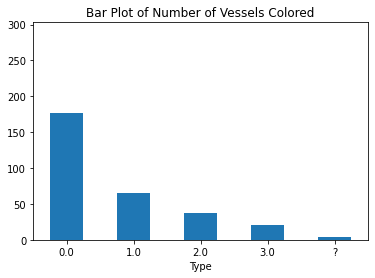

In [68]:
ax = bar['count'].plot.bar(rot=0, ylim=[0, len(df)], legend=False)
ax.set_title('Bar Plot of Number of Vessels Colored')
ax.set_xlabel('Type')
plt.show()

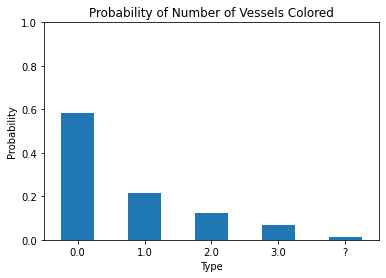

In [69]:
ax = bar['prob'].plot.bar(rot=0, ylim=[0, 1], legend=False)
ax.set_title('Probability of Number of Vessels Colored')
ax.set_xlabel('Type')
ax.set_ylabel('Probability')
plt.show()

Los datos de número de veasos coloreados por fluoroscopia no se encuentran uniformemente distribuidos.

- El 59% de los datos tienen 0 vasos coloreados
- El 21% de los datos tienen 1 vasos coloreados
- El 13% de los datos tienen 2 vasos coloreados
- El 7% de los datos tienen 3 vasos coloreados

### Thalassemia

Esta variable puede tomar tres valores:

- 3: Normal
- 6: Fixed defect
- 7: Reversable defect

In [70]:
df.query('thal not in ("3.0", "6.0", "7.0")')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,caNull
87,53,0,3,128,216,0,2,115,0,0.0,1,0,?,0,0.0
266,52,1,4,128,204,1,0,156,1,1.0,2,0,?,2,0.0


Hay valores nulos, no todos los valores se encuentran dentro del rango $\{3, 6, 7 \}$ para el numero de vasos coloreados por fluoroscopia.

Se estudiará como sustituir estos valores nulos (`"?"`) o si estas filas deberán ser omitidas.

In [71]:
prueba = df[['ca']].copy()
prueba = prueba[prueba['ca'] != '?']
prueba.ca = pd.to_numeric(prueba.ca).astype('int32')

In [72]:
bar = df.groupby('thal').agg(count = ('thal', 'count'))
bar['prob'] = bar['count'] / bar['count'].sum()
bar

,count,prob
thal,,
3.0,166,0.547855
6.0,18,0.059406
7.0,117,0.386139
?,2,0.006601


Se decidió retener todos los datos, sin eliminar filas. Por lo tanto, se decidió sustituir estos valores faltantes dado que es una variable categórica por el valor más frecuente, ya que es el de mayor probabilidad de ocurrencia.

In [73]:
df['thalNull'] = df['thal']
df.loc[df['thalNull'] == '?', 'thal'] = float(df.thal.mode()[0])
df.loc[df['thalNull'] != '?', 'thal'] = df['thal']
df['thal'] = pd.to_numeric(df['thal']).astype('int32')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,caNull,thalNull
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,1.0,3.0


In [74]:
df.query('thalNull not in (3, 6, 7)')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,caNull,thalNull
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,1.0,3.0


In [75]:
bar = df.groupby('thalNull').agg(count = ('thalNull', 'count'))
bar['prob'] = bar['count'] / bar['count'].sum()
bar

,count,prob
thalNull,,
3.0,166,0.547855
6.0,18,0.059406
7.0,117,0.386139
?,2,0.006601


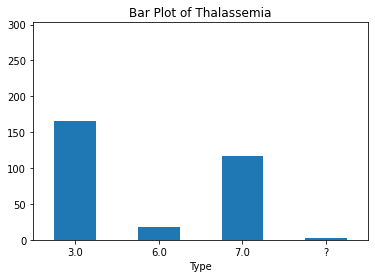

In [76]:
ax = bar['count'].plot.bar(rot=0, ylim=[0, len(df)], legend=False)
ax.set_title('Bar Plot of Thalassemia')
ax.set_xlabel('Type')
plt.show()

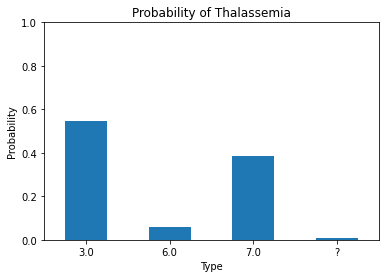

In [77]:
ax = bar['prob'].plot.bar(rot=0, ylim=[0, 1], legend=False)
ax.set_title('Probability of Thalassemia')
ax.set_xlabel('Type')
ax.set_ylabel('Probability')
plt.show()

Los datos de Thalassemia no se encuentran uniformemente distribuidos.

- El 55% de los datos corresponde a normal.
- El 6% de los datos corresponde a fixed defect.
- El 39% de los datos corresponde a reversable defect.

### Presence of Heart Disease

Esta variable puede tomar cuatro valores:

Ausencia:
- 0

Niveles de presencia de enfermedad:
- 1
- 2
- 3
- 4

In [78]:
df.query('num not in (0, 1, 2, 3, 4)')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,caNull,thalNull


No hay valores nulos, todos los valores se encuentran dentro del rango $\{0, 1, 2, 3, 4\}$ para la presencia de enfermedad en el corazón de la persona.

Sin embargo, solo es de interés saber si hay presencia de enfermedad en el corazón de la persona no el nivel de presencia, por lo que se cambiara el espacio de estados de $\{ 0, 1, 2, 3, 4 \}$ a solo $\{ 0, 1 \}$.

In [79]:
df.loc[df['num'] == 0, 'heartdis'] = 0
df.loc[df['num'] != 0, 'heartdis'] = 1
df.heartdis = df.heartdis.astype(int)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,caNull,thalNull,heartdis
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,1.0,3.0,1


In [80]:
bar = df.groupby('heartdis').agg(count = ('heartdis', 'count'))
bar['prob'] = bar['count'] / bar['count'].sum()
bar

,count,prob
heartdis,,
0,164,0.541254
1,139,0.458746


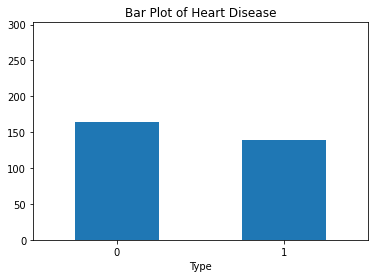

In [81]:
ax = bar['count'].plot.bar(rot=0, ylim=[0, len(df)], legend=False)
ax.set_title('Bar Plot of Heart Disease')
ax.set_xlabel('Type')
plt.show()

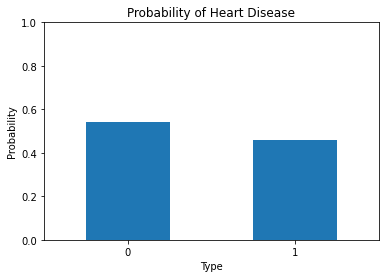

In [82]:
ax = bar['prob'].plot.bar(rot=0, ylim=[0, 1], legend=False)
ax.set_title('Probability of Heart Disease')
ax.set_xlabel('Type')
ax.set_ylabel('Probability')
plt.show()

Los datos de enfermedad en el corazón no se encuentran uniformemente distribuidos.
Sin embargo, hay cantidad similar de datos para personas con y sin enfermedad del corazón.

## Summary

Tenemos dos grupos de variables: las numéricas y las categóricas. Además, una variable _target_ a estudiar.


### Variables Numéricas

- Edad (age)
- Presión Arterial en Reposo (trestbps)
- Colesterol Sérico (chol)
- Frecuencia Cardiaca Máxima (thalach)
- Depresion del ST Inducida por Ejercicio en Relación con Reposo (oldpeak)

### Variables Categóricas

- Sexo (sex)
- Tipo de Dolor en Pecho (cp)
- Azucar en Sange en Ayunas (fbs)
- Resultados Electrocardiográficos en Reposo (restecg)
- Angina Inducida por Ejercicio (exang)
- Pendiente Segmento ST de Ejercicio Máximo (slope)
- Número de Vasos Principales coloreados por Fluoroscopia (ca)
- Thalassemia (thal)


### Target

- Presencia de Enfermedad Cardiaca (heartdis)